<a href="https://colab.research.google.com/github/soundarya1992/My-Projects/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading data
train = pd.read_csv("train_ctrUa4K.csv") 
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
#Copy of Train and Test dataset
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

# Target Variable

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

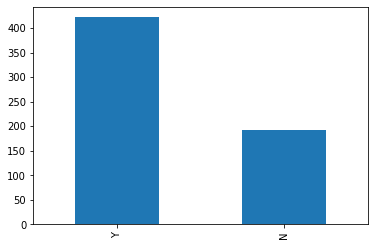

In [10]:
train['Loan_Status'].value_counts().plot.bar()

# Independent Variable (Categorical)

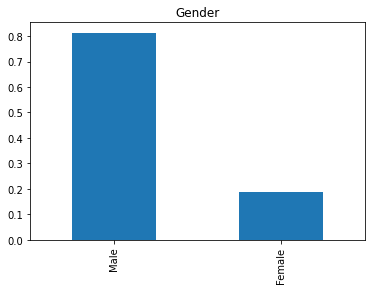

In [11]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

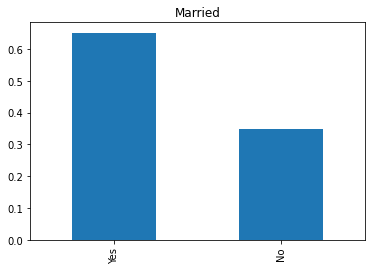

In [12]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

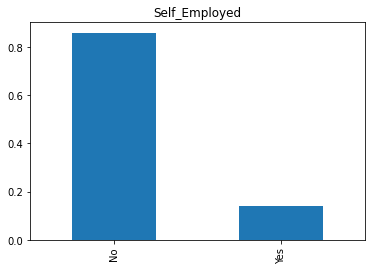

In [13]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

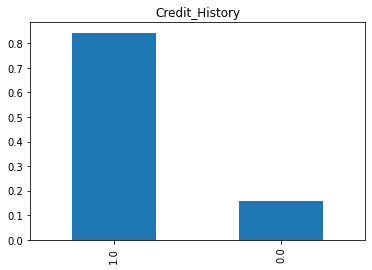

In [14]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 


It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

# Independent Variable (Ordinal)

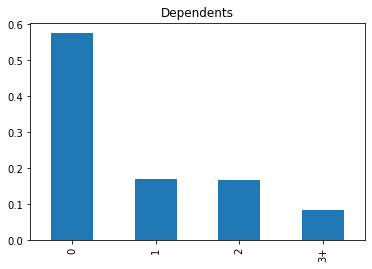

In [15]:
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 

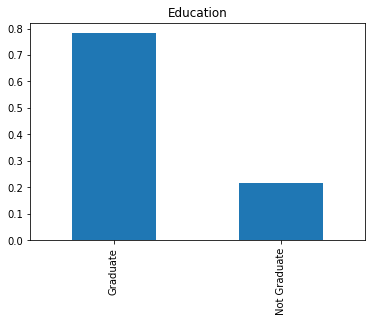

In [16]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

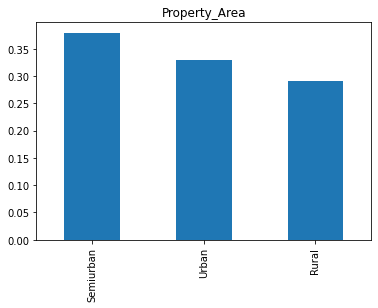

In [17]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

# Independent Variable (Numerical)

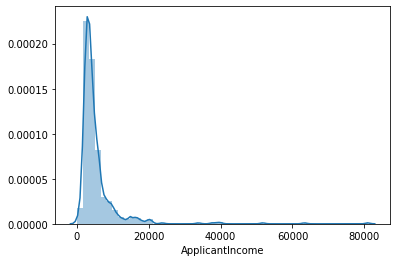

In [18]:
sns.distplot(train['ApplicantIncome'])

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed

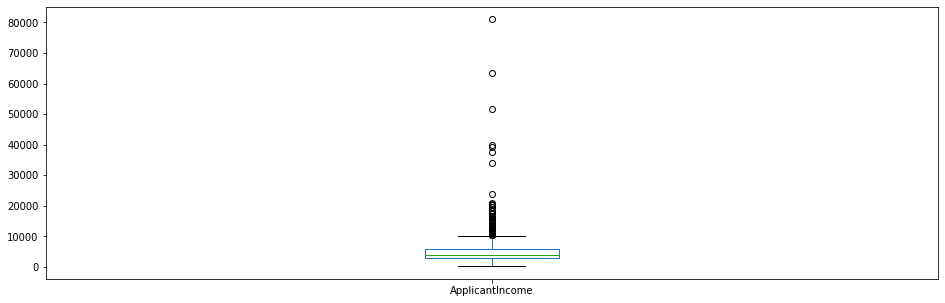

In [19]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

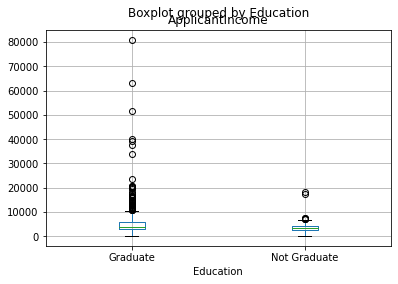

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

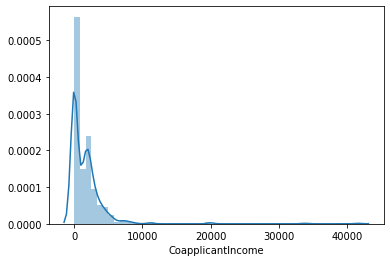

In [21]:
sns.distplot(train['CoapplicantIncome']);

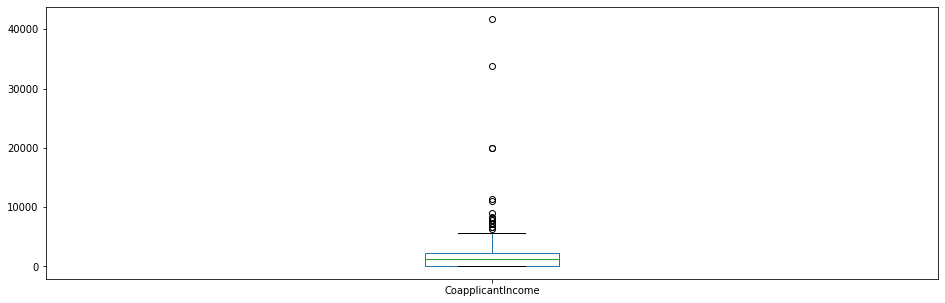

In [22]:
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

similar distribution as that of the applicant income

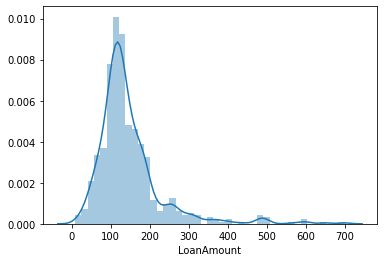

In [23]:
sns.distplot(train['LoanAmount']); 

The distribution is fairly normal

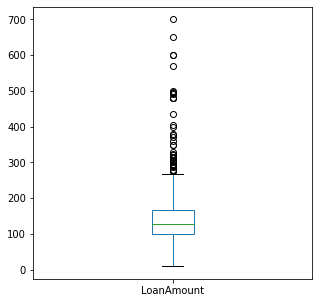

In [24]:
train['LoanAmount'].plot.box(figsize=(5,5))

We see a lot of outliers in this variable

# Bivariate Analysis

Categorical Vs Target Variable

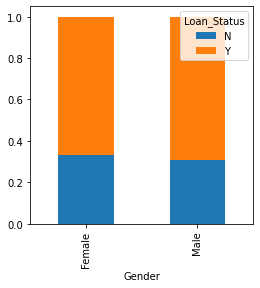

In [25]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

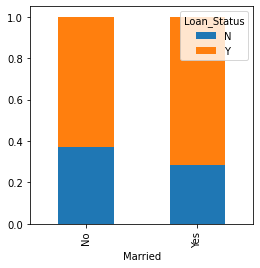

In [26]:
Married = pd.crosstab(train['Married'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Proportion of married applicants is higher for the approved loans.

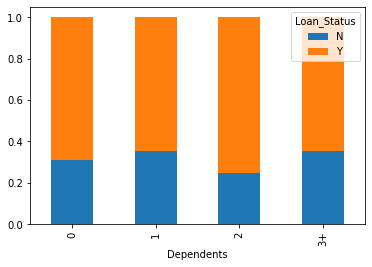

In [27]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

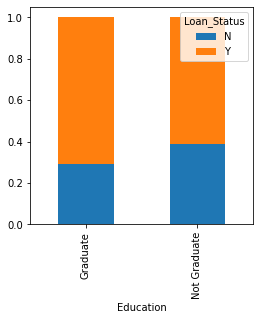

In [28]:
Education = pd.crosstab(train['Education'],train['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

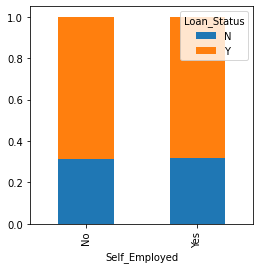

In [29]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

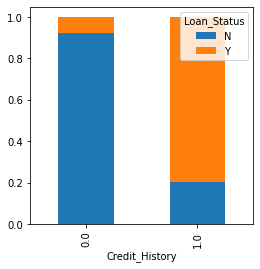

In [30]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It seems people with credit history as 1 are more likely to get their loans approved.

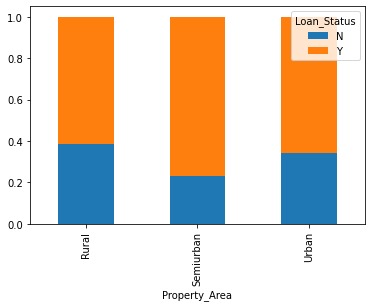

In [31]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Numerical Vs Target Variable

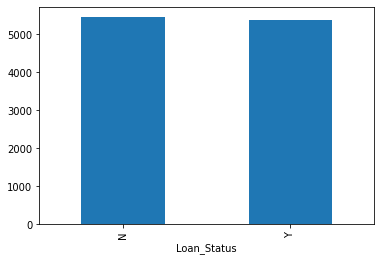

In [32]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

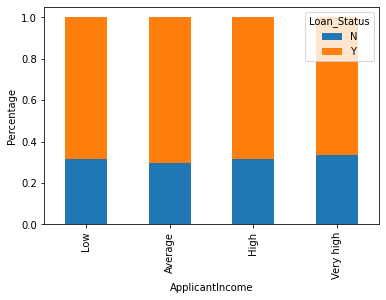

In [33]:
from matplotlib import pyplot, pylab

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
pyplot.show()

It can be inferred that Applicant income does not affect the chances of loan approval

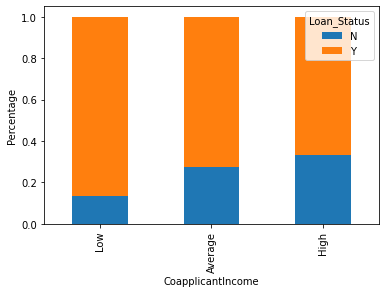

In [34]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

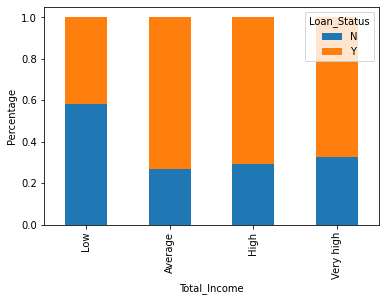

In [35]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

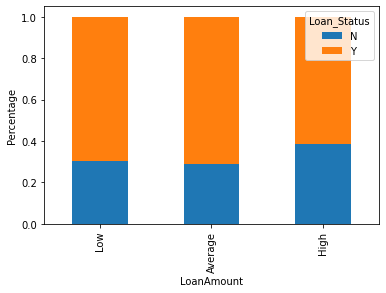

In [36]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. 

We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [37]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

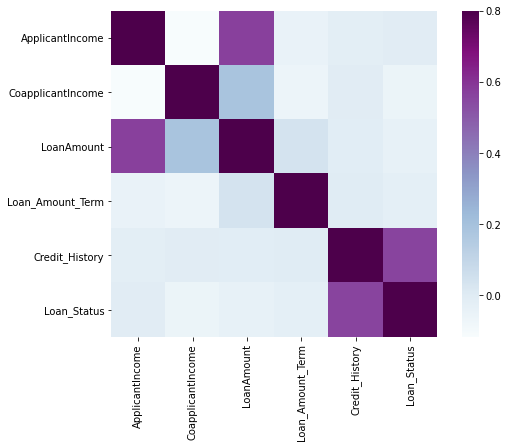

In [38]:
matrix = train.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [39]:
#Missing value imputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [41]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [42]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [43]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Let’s fill all the missing values in the test dataset too with the same approach.

In [45]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [47]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

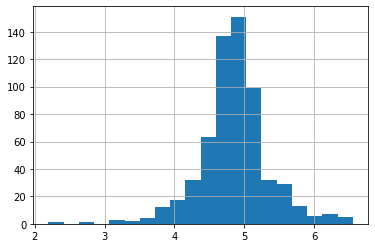

In [48]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [49]:
#Drop ID Column- Loan_ID in train and test
train = train.drop('Loan_ID',axis=1) 
test = test.drop('Loan_ID',axis=1)

In [50]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

Dummy variables for the categorical variables

In [51]:
X=pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

In [55]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

So our predictions are almost 76% accurate, i.e. we have identified 76% of the loan status correctly.

In [56]:
pred_test = model.predict(test)

In [58]:
#Read the Submission File
submission=pd.read_csv("sample_submission_49d68Cx.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission

In [59]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

Let’s convert 1 and 0 to Y and N.

In [60]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [63]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv', index=False)

Score in Leaderboard is 0.7847

In [64]:
from sklearn.model_selection import StratifiedKFold

In [68]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
  print('\n{} of kfold {}'.format(i,kf.n_splits))     
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]         
  model = LogisticRegression(random_state=1)     
  model.fit(xtr, ytr)     
  pred_test = model.predict(xvl)     
  score = accuracy_score(yvl,pred_test)     
  print('accuracy_score',score)     
  i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


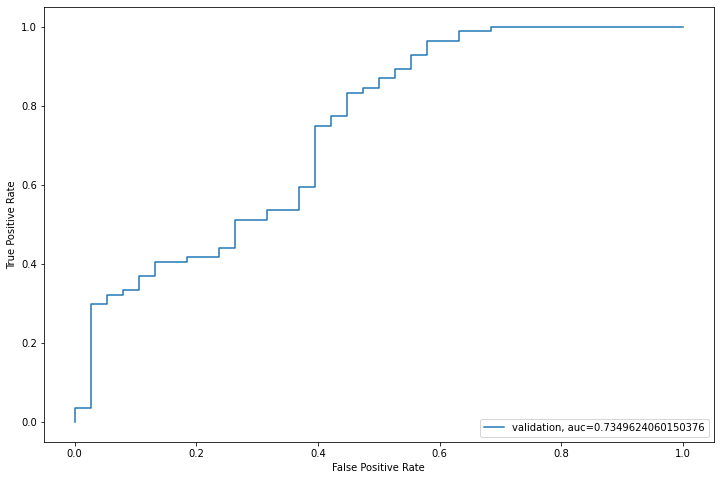

In [69]:
#Visualising ROC Curve
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

We got an auc value of 0.73

In [71]:
submission['Loan_Status']=pred_test 
submission['Loan_ID'] = test_original['Loan_ID']

We need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [72]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [73]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv', index = False)

Your score for this submission is : 0.7638888888888888.

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [74]:
#Create Total_Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

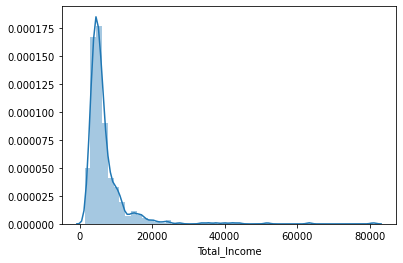

In [75]:
sns.distplot(train['Total_Income']);

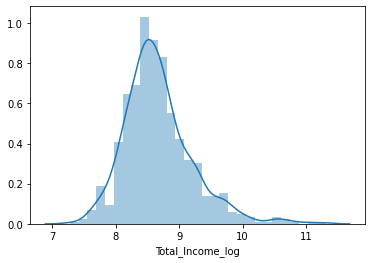

In [76]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [77]:
#Create EMI

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

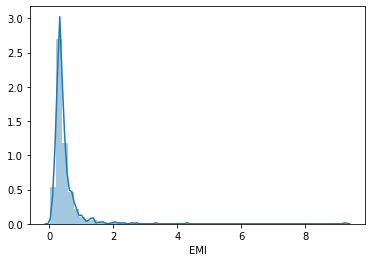

In [79]:
#Checking the distribution

sns.distplot(train['EMI'])

In [80]:
#Create Balance Income feature now and check its distribution.
# Multiplying with 1000 to make the units equal 

train['Balance Income']=train['Total_Income']-(train['EMI']*1000)  
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

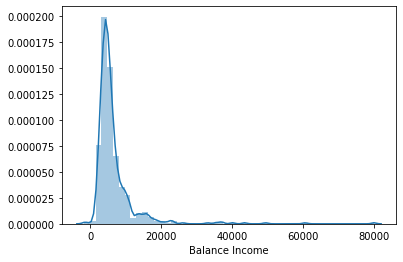

In [81]:
#Checking the distribution

sns.distplot(train['Balance Income']);

In [82]:
#Removing the variables after creating the new ones

train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [83]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status 

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)
model.fit(x_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [85]:
pred_xg = model.predict(x_cv)
accuracy_score(y_cv,pred_xg)

0.7783783783783784

In [86]:
pred_test_xg = model.predict(test)

In [ ]:
#Read the Submission File
#submission=pd.read_csv("sample_submission_49d68Cx.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission

In [87]:
submission['Loan_Status']=pred_test_xg 
submission['Loan_ID']=test_original['Loan_ID']

Let’s convert 1 and 0 to Y and N.

In [88]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [89]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('xg.csv', index=False)

Your score for this submission is : 0.6458333333333334.

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train, y_train)

In [96]:
pred_dt = clf.predict(x_cv)
accuracy_score(y_cv,pred_dt)

0.6864864864864865

In [97]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
  print('\n{} of kfold {}'.format(i,kf.n_splits))     
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]         
  model = DecisionTreeClassifier(random_state=1)     
  model.fit(xtr, ytr)     
  pred_test = model.predict(xvl)     
  score = accuracy_score(yvl,pred_test)     
  print('accuracy_score',score)     
  i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


The best accuracy on the public leaderboard is achieved by Logistic Regression (0.7847)